<a href="https://colab.research.google.com/github/Hyunjoon83/HYU_CSE/blob/main/AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

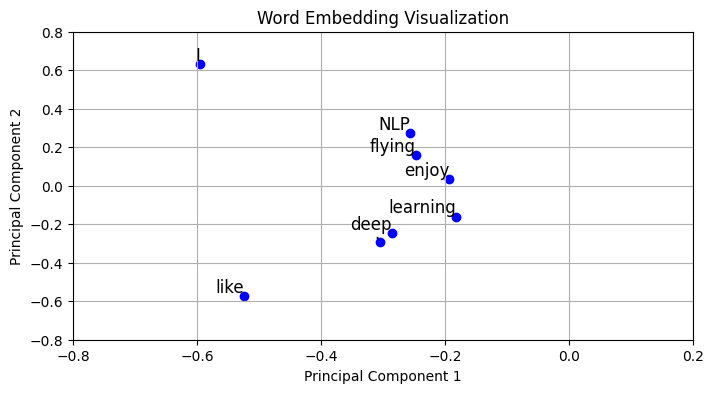

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

la=np.linalg
words=["I","like","enjoy","deep","learning","NLP","flying","."]

X=np.array([[0,2,1,0,0,0,0,0],
           [2,0,0,1,0,1,0,0],
           [1,0,0,0,0,0,1,0],
           [0,1,0,0,1,0,0,0],
           [0,0,0,1,0,0,0,1],
           [0,1,0,0,0,0,0,1],
           [0,0,1,0,0,0,0,1],
           [0,0,0,0,1,1,1,0]])
U,s,Vh=la.svd(X,full_matrices=False)

# 주성분 분석 결과의 좌표를 정렬
sorted_indices = np.argsort(U[:, 0])  # U[:, 0] 기준으로 정렬
sorted_words = [words[i] for i in sorted_indices]

# 정렬된 단어와 좌표를 그래프에 표시
plt.figure(figsize=(8, 4))  # 그래프 크기 조절
plt.scatter(U[:, 0], U[:, 1], marker='o', color='b')
for i, word in enumerate(sorted_words):
    plt.text(U[i, 0], U[i, 1], word, fontsize=12, ha='right', va='bottom')

plt.xlim(-0.8, 0.2)  # x축 범위 설정
plt.ylim(-0.8, 0.8)  # y축 범위 설정

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Word Embedding Visualization")
plt.grid()
plt.show()

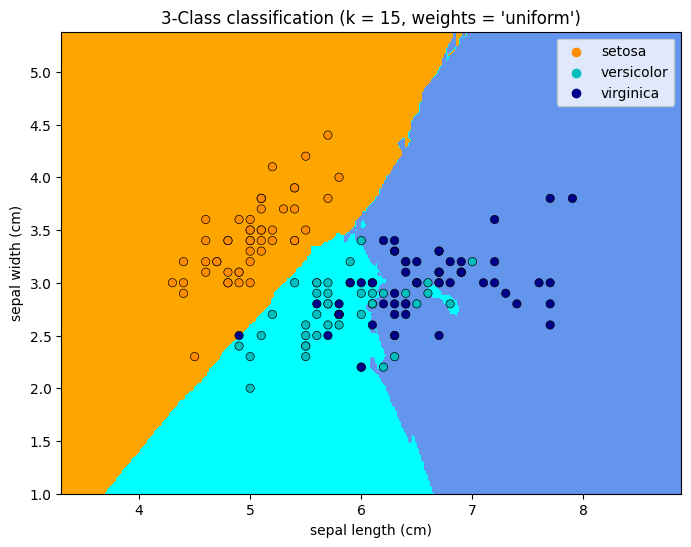

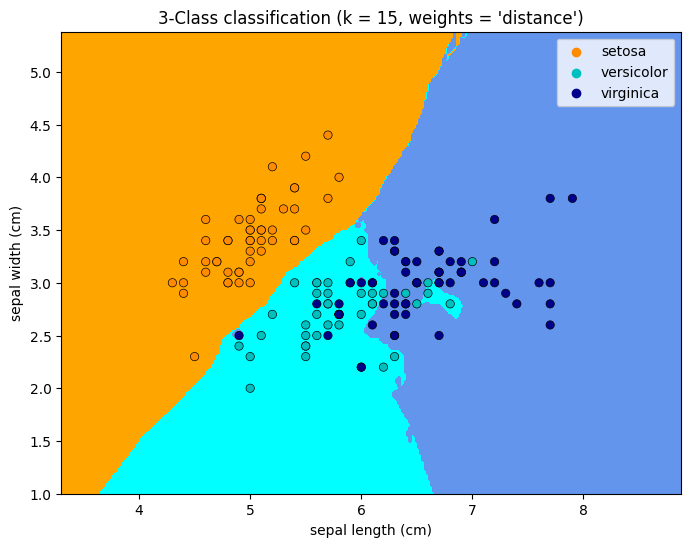

In [11]:
# K-NN algorithms
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors=15

# import some data to play with
iris=load_iris()

# we only take the first two features. We could avoid this ugly slicing by using a two-dimension dataset
X=iris.data[:, :2]
y=iris.target

h=0.02 # step size in the mesh

# Create color maps
cmap_light=ListedColormap(["orange","cyan","cornflowerblue"])
cmap_bold=["darkorange","c","darkblue"]

for weights in ["uniform","distance"]:
  # we create an instance of Neighbors Classifier and fit the data
  clf=KNeighborsClassifier(n_neighbors, weights=weights)
  clf.fit(X,y)

  # Plot the decision boundary. For that, we will assign a color to each point in the mesh [x_min, x_max]x[y_min, y_max]
  x_min, x_max=X[:,0].min()-1, X[:,0].max()+1
  y_min, y_max=X[:,1].min()-1, X[:,1].max()+1
  xx,yy=np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  Z=clf.predict(np.c_[xx.ravel(),yy.ravel()])

  # Put the result into a color plot
  Z=Z.reshape(xx.shape)
  plt.figure(figsize=(8,6))
  plt.contourf(xx,yy,Z,cmap=cmap_light)

  # Plot also the training points
  sns.scatterplot(
      x=X[:,0],
      y=X[:,1],
      hue=iris.target_names[y],
      palette=cmap_bold,
      alpha=1.0,
      edgecolor="black",
  )
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())
  plt.title(
      "3-Class classification (k = %i, weights = '%s')" % (n_neighbors,weights)
  )
  plt.xlabel(iris.feature_names[0])
  plt.ylabel(iris.feature_names[1])

plt.show()

In [12]:
# Naive Bayes
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

X,y=load_iris(return_X_y=True)
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.5, random_state=0)
gnb=GaussianNB()
y_pred=gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"%(X_test.shape[0],(y_test!=y_pred).sum()))

Number of mislabeled points out of a total 75 points : 4


<ipython-input-13-8f19dc7d3101>:44: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
<ipython-input-13-8f19dc7d3101>:44: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
<ipython-input-13-8f19dc7d3101>:44: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
<ipython-input-13-8f19dc7d3101>:44: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
<ipython-input-13-8f19dc7d3101>:44: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
<ipython-input-13-8f19dc7d3101>:44: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


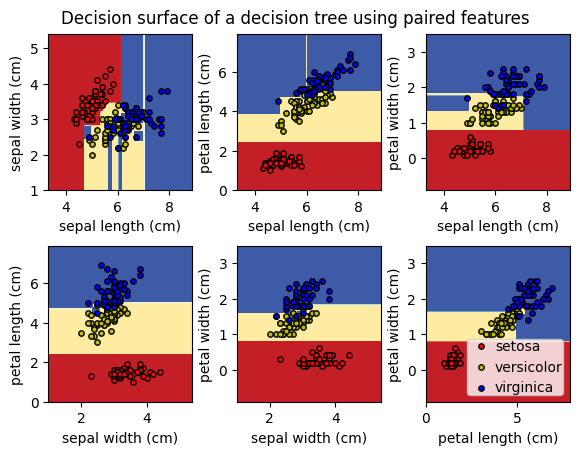

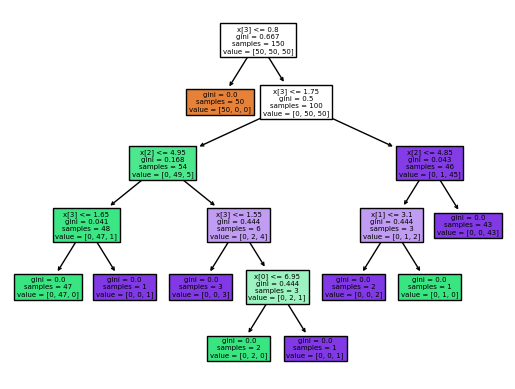

In [13]:
# Decision Tree
from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Parameters
n_classes=3
plot_colors="ryb"
plot_step=0.02

# Load data
iris=load_iris()

for pairidx, pair in enumerate([[0,1],[0,2],[0,3],[1,2],[1,3],[2,3]]):
  # We only take the two corresponding features
  X=iris.data[:, pair]
  y=iris.target

  # Train
  clf=DecisionTreeClassifier().fit(X,y)

  # Plot the decision boundary
  plt.subplot(2,3,pairidx+1)

  x_min, x_max=X[:,0].min()-1, X[:,0].max()+1
  y_min, y_max=X[:,1].min()-1, X[:,1].max()+1
  xx,yy=np.meshgrid(
      np.arange(x_min, x_max, plot_step),np.arange(y_min, y_max, plot_step)
  )
  plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

  Z=clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z=Z.reshape(xx.shape)
  cs=plt.contourf(xx,yy,Z,cmap=plt.cm.RdYlBu)

  plt.xlabel(iris.feature_names[pair[0]])
  plt.ylabel(iris.feature_names[pair[1]])

  # Plot the training points
  for i, color in zip(range(n_classes), plot_colors):
    idx=np.where(y==i)
    plt.scatter(
        X[idx,0],
        X[idx,1],
        c=color,
        label=iris.target_names[i],
        cmap=plt.cm.RdYlBu,
        edgecolor="black",
        s=15,
    )
plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
plt.axis("tight")

plt.figure()
clf=DecisionTreeClassifier().fit(iris.data, iris.target)
plot_tree(clf, filled=True)
plt.show()

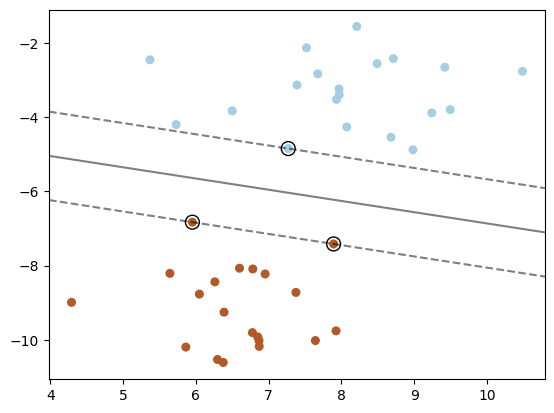

In [16]:
# SVM
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

# we create 40 separable points
X,y=make_blobs(n_samples=40, centers=2, random_state=6)

# fit the model, don't regularize for illustration purposes
clf=svm.SVC(kernel="linear",C=1000)
clf.fit(X,y)

plt.scatter(X[:,0],X[:,1],c=y,s=30,cmap=plt.cm.Paired)

# plot the decision function
ax=plt.gca()
xlim=ax.get_xlim()
ylim=ax.get_ylim()

# create grid to evaluate model
xx=np.linspace(xlim[0],xlim[1],30)
yy=np.linspace(ylim[0],ylim[1],30)
YY,XX=np.meshgrid(yy,xx)
xy=np.vstack([XX.ravel(),YY.ravel()]).T
Z=clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(
    XX, YY, Z, colors="k", levels=[-1,0,1], alpha=0.5, linestyles=["--","-","--"]
)
# plot support vectors
ax.scatter(
    clf.support_vectors_[:,0],
    clf.support_vectors_[:,1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()

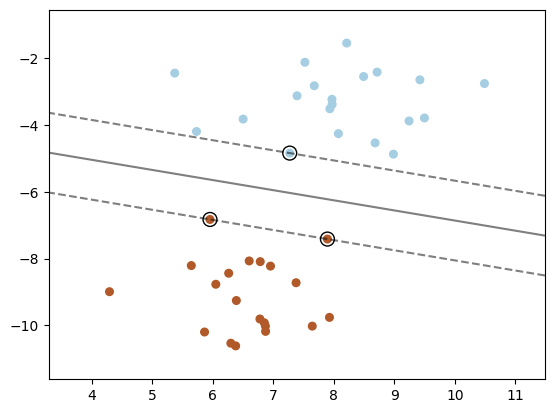

In [17]:
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.inspection import DecisionBoundaryDisplay

# we create 40 separable points
X, y=make_blobs(n_samples=40, centers=2, random_state=6)

# fit the model, don't regularize for illustration purposes
clf=svm.SVC(kernel="linear",C=1000)
clf.fit(X,y)

plt.scatter(X[:,0], X[:,1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax=plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    plot_method="contour",
    colors="k",
    levels=[-1,0,1],
    alpha=0.5,
    linestyles=["--","-","--"],
    ax=ax,
)
# plot support vectors
ax.scatter(
    clf.support_vectors_[:,0],
    clf.support_vectors_[:,1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()